In [86]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import handy
import glob
from joblib import Parallel, delayed
import sigpy as sp
import sigpy.plot as pl
import sigpy.mri as mr
from scipy.io import loadmat
from scipy.io import savemat
import sys
import math
from scipy import signal
from itertools import product
import time
import scipy.ndimage as ndimage
from scipy.interpolate import griddata, interpolate
import PIL
import glob

In [2]:
path_caipi_data = 'C:/Users/jamalzada/Documents/Data/200403_caipi_pilot/'

In [3]:
datalist = sorted(glob.glob(path_caipi_data+"raw*.mat"))
datalist

['C:/Users/jamalzada/Documents/Data/200403_caipi_pilot\\raw_001_full.mat',
 'C:/Users/jamalzada/Documents/Data/200403_caipi_pilot\\raw_002_sense2x2.mat',
 'C:/Users/jamalzada/Documents/Data/200403_caipi_pilot\\raw_003_sense2x3.mat',
 'C:/Users/jamalzada/Documents/Data/200403_caipi_pilot\\raw_004_caipi2x2.mat',
 'C:/Users/jamalzada/Documents/Data/200403_caipi_pilot\\raw_005_caipi2x3.mat',
 'C:/Users/jamalzada/Documents/Data/200403_caipi_pilot\\raw_006_caipi2x2_fullcenter.mat',
 'C:/Users/jamalzada/Documents/Data/200403_caipi_pilot\\raw_007_caipi2x3_fullcenter.mat']

In [4]:
data_help = Parallel(n_jobs=-1,backend='loky')(delayed(handy.read_matlab)(datalist[i]) for i in range(len(datalist)))

In [5]:
data_complex = [data_help[i]['alldata']['real']+1j*data_help[i]['alldata']['imag'] for i in range(len(datalist))]

In [6]:
ksp = np.load('cartesian_ksp.npy')
ksp.shape

(8, 230, 180)

In [7]:
caipi22 = np.copy(data_complex[5])

In [8]:
caipifft = np.fft.ifftn(caipi22,axes=(1,2,3))

In [9]:
caipipad=np.pad(caipi22,[[0,0],[0,0],[4,4],[4,4]],mode='constant')

caipicenter=np.copy(caipipad)

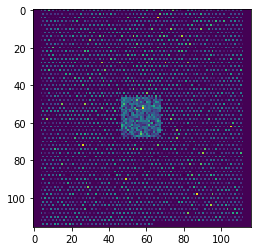

In [10]:
plt.imshow(abs((caipicenter[0,:,100,:])))

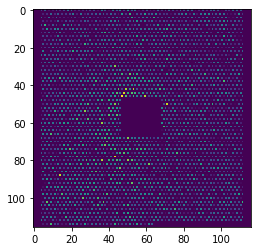

In [11]:
caipinoc = np.copy(caipipad)
caipinoc[:,47:68,:,47:68]=0
plt.imshow(abs((caipinoc[10,:,100,:])))

In [12]:
caipicenter.shape

(32, 116, 116, 116)

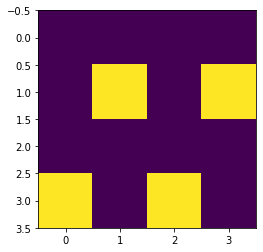

In [13]:
p = np.zeros((4,4))
p[1,1]=1;p[1,3]=1;p[3,0]=1;p[3,2]=1
plt.imshow(p)


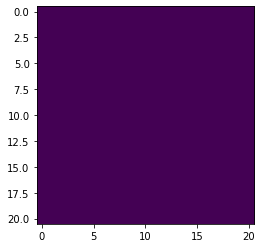

In [14]:
plt.imshow(abs(caipicenter[0,47:68,100,47:68])!=0)

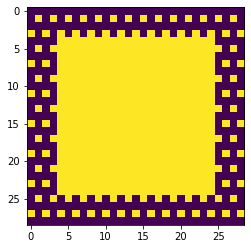

In [15]:
plt.imshow(abs(caipicenter[0,43:72,100,43:72])!=0)

In [16]:
fft = np.fft.ifftn(caipicenter,axes=(1,2,3))

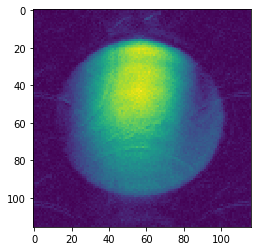

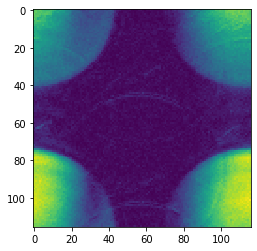

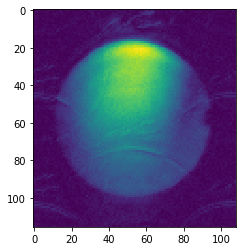

In [17]:
nshift = abs((fft[0,:,100,:]))
shift = abs(np.fft.fftshift(fft[0,:,100,:]))
plt.imshow(nshift)
plt.figure()
plt.imshow(shift)
plt.figure()
plt.imshow(abs(caipifft)[0,:,100,:])

In [18]:
center=caipicenter[:,47:68,:,47:68]


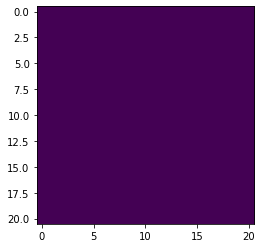

In [19]:
plt.imshow(abs(center)[0,:,100,:]!=0)


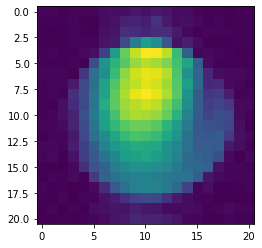

In [20]:
centerimg=np.fft.ifftn(center,axes=(1,2,3))
plt.imshow(abs(centerimg[0,:,100,:]))

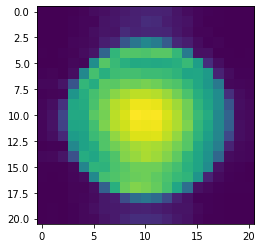

In [21]:
img_combined = np.sqrt(np.sum(abs(centerimg)**2,0))
plt.imshow(abs(img_combined[:,100,:]))
s0=centerimg/img_combined
s1 = np.zeros(s0.shape,dtype=complex)
kernel = np.full((4,4),1)/4**2
for i in range(32):
    for z in range(s0.shape[2]):
        s1[i,:,z,:] = signal.convolve2d(s0[i,:,z,:],kernel,'same')

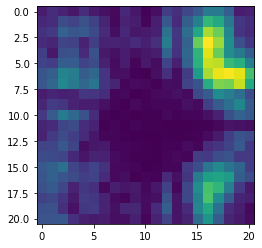

In [22]:
plt.imshow(abs(s1[21,:,10,:]))

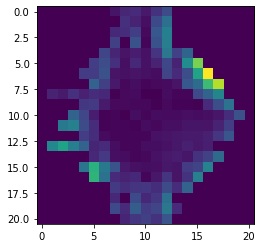

In [118]:
thresh = 0.02*np.max(abs(img_combined))
mask = abs(img_combined)>thresh
s2 = s1*mask
plt.imshow(abs(s2[10,:,10,:]))

In [122]:
[PIL.Image.fromarray(s2[i,:,j,:]) for i in range(32) for j in range(116)]

TypeError: Cannot handle this data type

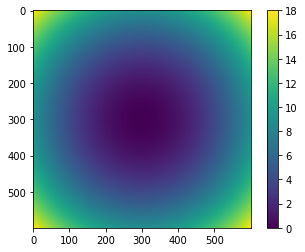

In [144]:
x = np.arange(-3,3,0.01)
y = np.arange(-3,3,0.01)
xx, yy = np.meshgrid(x,y)
z = xx**2+yy**2
f = interpolate.interp2d(x,y,z)
plt.figure()
plt.imshow(z)
plt.colorbar()

In [145]:
lx=xx.flatten()[:,None]
ly=yy.flatten()[:,None]
points = np.hstack((lx,ly))
values = points[:,0]**2+points[:,1]**2
#grid = griddata(points,values,(xxnew,yynew), fill_value='extrapolate')

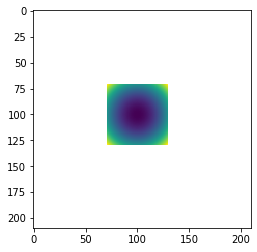

In [146]:
plt.imshow(grid)

In [149]:
xnew = np.arange(-5,5,0.01)
ynew = np.arange(-5,5,0.01)
znew = f(xnew,ynew)
xxnew, yynew = np.meshgrid(xnew,ynew)

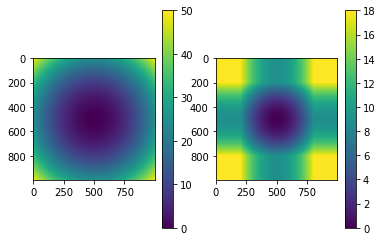

In [154]:
plt.subplot(1,2,1)
plt.imshow(xxnew**2+yynew**2)
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(znew)
plt.colorbar()

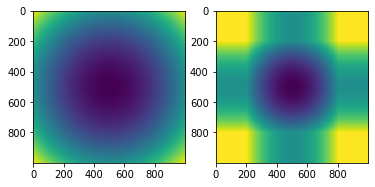

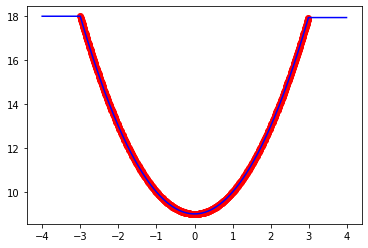

In [84]:
plt.plot(x, z[0,:],'ro-',xnew,znew[0,:],'b-')

In [135]:

grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]
points = np.random.rand(1000, 2)
values = func(points[:,0], points[:,1])


(1000, 2)

In [131]:
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

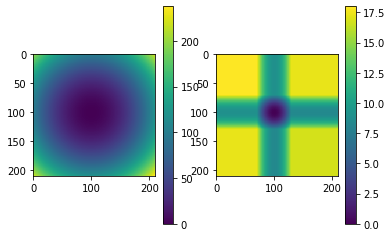

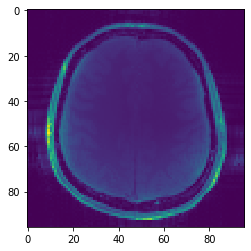

In [180]:
plt.imshow(abs(rec))

In [34]:
img = sp.ifft(raw,axes=(1,2))
img_comb = np.sqrt(np.sum(abs(img)**2,0))
d0 = img/img_comb
d1 = np.zeros(img.shape,dtype=complex)
kernel = np.full((9,9),1,dtype=complex)/9**2
for i in range(16):
    d1[i,:,:] = signal.convolve2d(d0[i,:,:],kernel,'same')

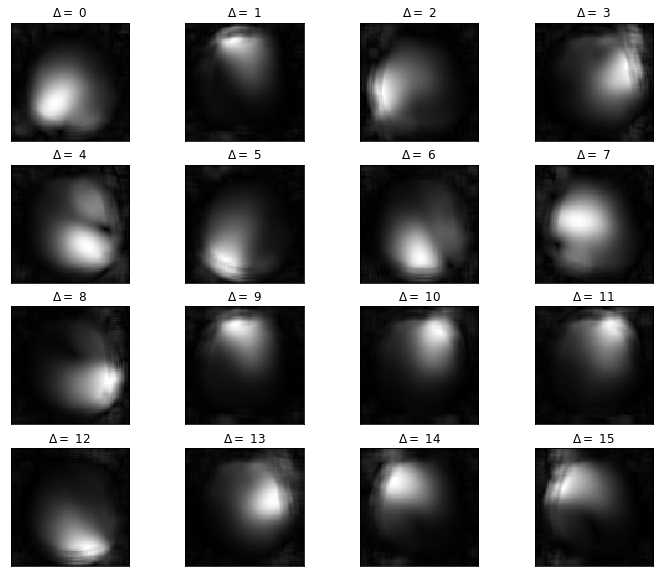

In [35]:
handy.plot_patterns(abs(d1),4)

(32, 21, 116, 21)

In [12]:
def swap(array):
    ndim = array.ndim
    count=1
    hulp = np.copy(array)
    for i in range(ndim-1)[::-1]:
        count+=1
        hulp = np.swapaxes(hulp,ndim-i-2,ndim-i-1)
    return hulp

In [13]:
dis = swap(caipinoc)

In [261]:
dis2=np.swapaxes(dis,1,2)

In [262]:
dis2.shape

(116, 116, 116, 32)

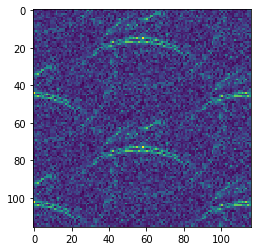

In [254]:
plt.imshow(abs(np.fft.ifftn(caipinoc,axes=(1,2,3))[0,:,100,:]))

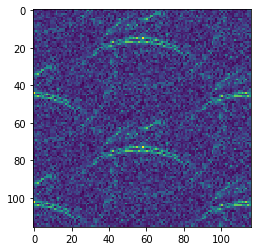

In [264]:
plt.imshow(abs(np.fft.ifftn(dis2,axes=(0,1,2))[:,:,100,0]))

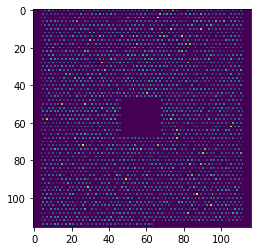

In [54]:
plt.imshow(abs(g[0,:,100,:]))

In [172]:
(caipi22[0,:,100,:]!=0)[47:68,43:64].shape

(21, 21)

In [224]:
cent = caipi22[:,:47:68,:,43:64]

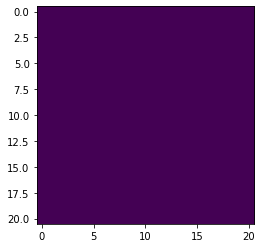

In [39]:
plt.imshow((caipi22[0,:,100,:]!=0)[47:68,43:64])

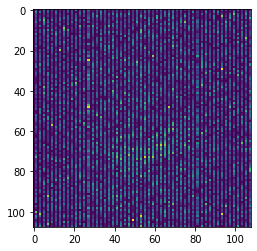

In [109]:
plt.imshow(abs(caipi22)[0,10,:,:])

In [79]:
x=np.arange(27).reshape((3,3,3))

In [100]:
g=np.pad(x,[[0,0],[0,0],[0,1]],mode='constant')
print(g)
print(g.shape)

[[[ 0  1  2  0]
  [ 3  4  5  0]
  [ 6  7  8  0]]

 [[ 9 10 11  0]
  [12 13 14  0]
  [15 16 17  0]]

 [[18 19 20  0]
  [21 22 23  0]
  [24 25 26  0]]]
(3, 3, 4)


In [14]:
handy.plot_patterns(data_complex)

AttributeError: 'list' object has no attribute 'shape'

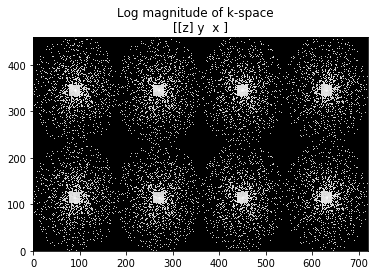

In [15]:
pl.ImagePlot(ksp, mode='l',z=0, title='Log magnitude of k-space')

In [7]:
def take_center(array,size):
    """Takes the center data of an array

    Parameters:
        array (numpy array): array of data
        size (int): percentage of the array

    Returns (numpy array): center of array 
    """
    size /= 200
    Nc,Nx,Ny,Nz = array.shape
    nx,ny,nz = int(Nx/2), int(Ny/2),int(Nz/2)
    rx,ry,rz = math.ceil(Nx*size), math.ceil(Ny*size), math.ceil(Nz*size)
    reduced = array[:,nx-rx:nx+rx,ny-ry:ny+ry,nz-rz:nz+rz]
    print(nx,ny,nz,rx,ry,rz)
    return reduced

In [8]:
datalist

['C:/Users/jamalzada/Documents/Data/200403_caipi_pilot\\raw_001_full.mat',
 'C:/Users/jamalzada/Documents/Data/200403_caipi_pilot\\raw_002_sense2x2.mat',
 'C:/Users/jamalzada/Documents/Data/200403_caipi_pilot\\raw_003_sense2x3.mat',
 'C:/Users/jamalzada/Documents/Data/200403_caipi_pilot\\raw_004_caipi2x2.mat',
 'C:/Users/jamalzada/Documents/Data/200403_caipi_pilot\\raw_005_caipi2x3.mat',
 'C:/Users/jamalzada/Documents/Data/200403_caipi_pilot\\raw_006_caipi2x2_fullcenter.mat',
 'C:/Users/jamalzada/Documents/Data/200403_caipi_pilot\\raw_007_caipi2x3_fullcenter.mat']

In [9]:
path = 'raw_data.mat'
data = handy.read_matlab(path)
ksp = data['raw'].squeeze()
sdata = loadmat('sref.mat')
g=sdata['s_ref']
raw = ksp['real']+1j*ksp['imag']
sref=np.copy(g)

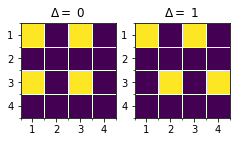

In [10]:
R=4
p=handy.caipi(R,2,[0,1])
handy.plot_caipi(p,[0,1])
h = int(96/R)
mask = np.kron(np.ones((h,h)),p[0])
#mask=1

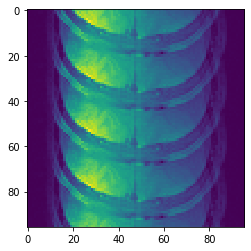

In [11]:
px = handy.caipi(4,1,[0])
plt.imshow(abs(sp.ifft(np.kron(np.ones((h,h)),px[0].T)*raw[0])))

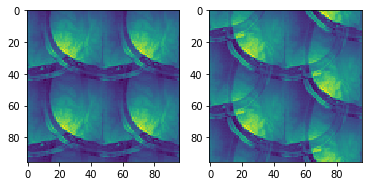

In [12]:
plt.subplot(1,2,1)
plt.imshow(abs(sp.ifft(np.kron(np.ones((h,h)),p[0])*raw[0])))
plt.subplot(1,2,2)
plt.imshow(abs(sp.ifft(np.kron(np.ones((h,h)),p[1])*raw[0])))

In [13]:
raw.shape

(16, 96, 96)

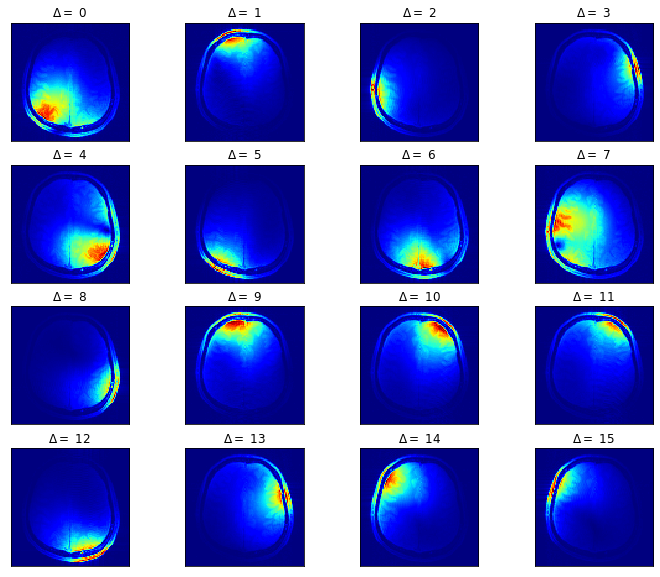

In [14]:
cleanimg = sp.ifft(raw,axes=(1,2))
handy.plot_patterns(abs(cleanimg),4,'jet')

In [15]:
srefswap = handy.swap(sref.squeeze(),1)
srefswap.shape

(16, 96, 96)

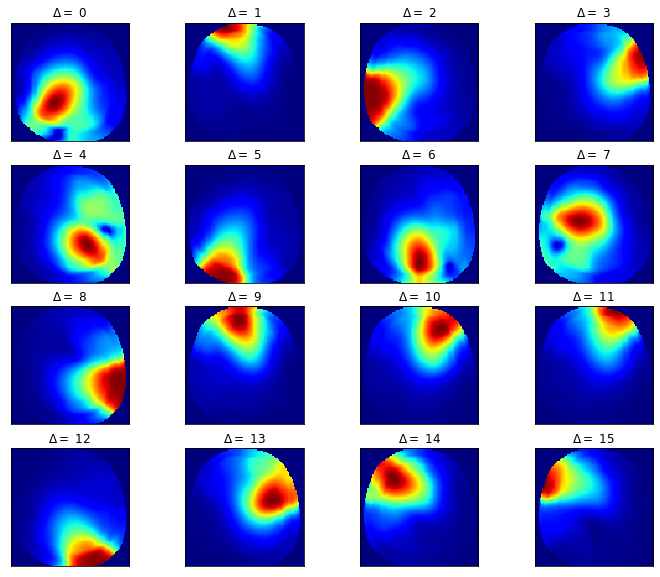

In [16]:
handy.plot_patterns(abs(srefswap),4,'jet')

In [17]:
handy.plot_patterns(abs(img0),4,'jet')

NameError: name 'img0' is not defined

In [18]:
img_combined_opt = np.sum(img0*np.conj(srefswap),0)
plt.imshow(abs(img_combined_opt))

NameError: name 'img0' is not defined

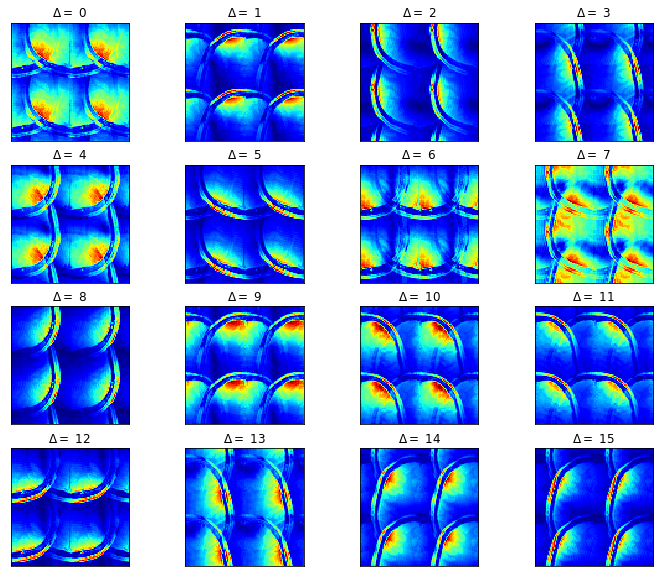

In [19]:
img = sp.ifft(mask*raw,axes=(1,2))
img_r2 = handy.swap(img)[:,:,None,:]
handy.plot_patterns(abs(img),4,'jet')

In [20]:
def sense(img,csm,R):
    [Nx,Ny,Nz,Nc] = img.shape
    out = np.zeros((Nx,Ny),dtype=complex)
    h = int(Nx/R)
    #print(h)
    for x in np.arange(h):
        x_idx = np.arange(x,Nx,h)
        
        for y in np.arange(Ny):
            S = csm[x_idx,y,0,:].T
            #S = np.reshape(csm[x_idx,y,0,:],(R,-1)).T
            hulp = np.reshape(img[x,y,0,:],(-1,1))
            out[x_idx,y] = (np.linalg.pinv(S)@hulp).squeeze()
        #print(S.shape,hulp.shape)
            #print(x_idx,y)
            
    return out

In [21]:
def sense3(img,csm,rx,ry):
    R = rx*ry
    [Nx,Ny,Nz,Nc] = img.shape
    out = np.zeros((Nx,Ny),dtype=complex)
    hx = int(Nx/rx)
    hy = int(Ny/ry)
    g = []
    for x in np.arange(hx): # loop along x-coordinates
        x_idx = np.arange(x,Nx,hx)
        for y in np.arange(hy): # loop along y-coordinates
            y_idx = np.arange(y,Ny,hy)[:]
            coord = np.array(list(product(x_idx,y_idx)))
            x_alias = csm[coord[:,0],coord[:,1],0,:]
            S = np.reshape(x_alias,(R,-1)).T
            hulp = np.reshape(img[x,y,0,:],(-1,1))
            vhelp = (np.linalg.pinv(S)@hulp).squeeze()
            #m = np.reshape(vhelp,(rx,ry))
            #print("this is m\n", m)
            out[coord[:,0],coord[:,1]] = vhelp
            #print(out[x_idx,:][:,y_idx])
            #print(x_idx,y,'and',x,y_idx)
    return out

In [22]:
brain = np.repeat(img_r2,96,axis=2)
sref_repeat = np.repeat(sref,96,axis=2)

In [23]:
def sense3numpy(img,csm,rx,ry):
    rx,ry = 2,2
    R = rx*rx
    Nx,Ny,Nz,Nc = 96,96,96,16
    out = np.zeros((Nx,Ny,Nz),dtype=complex)
    hx = int(Nx/rx)
    hy = int(Ny/ry)
    coord_matrix = np.zeros((hx,hy,R,2),dtype=int)
    csm_matrix = np.zeros((hx,hy,R,Nz,Nc),dtype=complex)
    S_matrix = np.zeros((hx,hy,Nz,Nc,R),dtype=complex)
    hulp_matrix = np.zeros((hx,hy,Nz,Nc),dtype=complex)
    for x in np.arange(hx):
        x_idx = np.arange(x,Nx,hx)
        for y in np.arange(hy):
            y_idx = np.arange(y,Ny,hy)
            coord_matrix[x,y] = np.array(list(product(x_idx,y_idx)))
            csm_aliased_points = csm[coord_matrix[x,y,:,0],coord_matrix[x,y,:,1],:,:]
            csm_matrix[x,y] = np.copy(csm_aliased_points)
            for z in np.arange(Nz):
                S = np.reshape(csm_matrix[x,y,:,z,:],(R,-1)).T
                hulp = np.reshape(img[x,y,z,:],(-1,1)).squeeze()
                S_matrix[x,y,z] = np.copy(S)
                hulp_matrix[x,y,z] = np.copy(hulp)
    S_all = np.reshape(S_matrix,(hx*hy*Nz,Nc,R))
    S_inv = np.linalg.pinv(S_all)
    hulp_all = np.reshape(hulp_matrix,(hx*hy*Nz,Nc))
    unfold = np.einsum('ijk,ik->ij',S_inv,hulp_all)
    unfold_reshape = np.reshape(unfold,(hx,hy,Nz,R))
    for i in range(hx):
        for j in range(hy):
            for z in range(Nz):
                out[coord_matrix[i,j,:,0],coord_matrix[i,j,:,1],z] = unfold_reshape[i,j,z].squeeze()
    return out

In [24]:
out_brain = sense3numpy(brain,sref_repeat,2,2)

In [25]:
def sense2numpy(img,csm,rx,ry):
    rx,ry = 2,2
    R = rx*ry
    Nx,Ny,Nz,Nc = img.shape
    out = np.zeros((Nx,Ny),dtype=complex)
    hx = int(Nx/rx)
    hy = int(Ny/ry)
    coord_matrix = np.zeros((hx,hy,R,2),dtype=int)
    csm_matrix = np.zeros((hx,hy,R,Nc),dtype=complex)
    S_matrix = np.zeros((hx,hy,Nc,R),dtype=complex)
    hulp_matrix = np.zeros((hx,hy,Nc),dtype=complex)
    for x in np.arange(hx):
        x_idx = np.arange(x,Nx,hx)
        for y in np.arange(hy):
            y_idx = np.arange(y,Ny,hy)
            coord_matrix[x,y] = np.array(list(product(x_idx,y_idx)))
            csm_aliased_points = csm[coord_matrix[x,y,:,0],coord_matrix[x,y,:,1],0,:]
            csm_matrix[x,y] = np.copy(csm_aliased_points)
            S = np.reshape(csm_matrix[x,y,:,:],(R,-1)).T
            hulp = np.reshape(img[x,y,:],(-1,1)).squeeze()
            S_matrix[x,y] = np.copy(S)
            hulp_matrix[x,y] = np.copy(hulp)
    S_all = np.reshape(S_matrix,(hx*hy,Nc,R))
    S_inv = np.linalg.pinv(S_all)
    hulp_all = np.reshape(hulp_matrix,(hx*hy,Nc))
    unfold = np.einsum('ijk,ik->ij',S_inv,hulp_all)
    unfold_reshape = np.reshape(unfold,(hx,hy,Nz,R))
    for i in range(hx):
        for j in range(hy):
            out[coord_matrix[i,j,:,0],coord_matrix[i,j,:,1]] = unfold_reshape[i,j,:].squeeze()
    return out

In [26]:
img = sense2numpy(img_r2,sref,2,2)

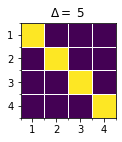

In [449]:
shifts = [0,1,2,3,4,5,6,7,8]
shifts = [5]
R=4
rx = 2
p=handy.caipi(R,1,shifts)
handy.plot_caipi(p,shifts)
h = int(96/R)
mask = np.kron(np.ones((h,h)),p[0])
#mask=1

IndexError: index 1 is out of bounds for axis 0 with size 1

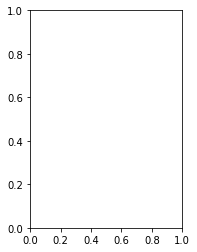

In [448]:
plt.subplot(1,2,1)
plt.imshow(p[1])
plt.subplot(1,2,2)
psf = abs((np.fft.fftn(p[1])))
plt.imshow(psf)
np.argwhere(np.around(psf,2)!=0)
img = sp.ifft(mask*raw,axes=(1,2))
img_r2 = handy.swap(img)[:,:,None,:]

(96, 96, 96, 16)

In [480]:
def caipi_recon3d(img,csm,rx,ry,shifts):
    R = rx*ry
    p = handy.caipi(R,rx,shifts)
    binary_aliasing_cell = abs(np.fft.fftn(p[0]))
    spatial_coord = np.argwhere(np.around(binary_aliasing_cell,2)!=0)
    Nx,Ny,Nz,Nc = img.shape
    out = np.zeros((Nx,Ny,Nz),dtype=complex)
    ry = R//rx
    hx = int(Nx/rx)
    hy = int(Ny/ry)
    coord_matrix_check = np.zeros((Nx,Ny),dtype=int)
    coord_matrix = np.zeros((int(hx*hy/Nx),Ny,R,2),dtype=int)
    coord_test = np.zeros((int(hx*hy/Nx),Ny),dtype=int)
    csm_matrix = np.zeros((int(hx*hy/Nx),Ny,R,Nz,Nc),dtype=complex)
    S_matrix = np.zeros((int(hx*hy/Nx),Ny,Nz,Nc,R),dtype=complex)
    hulp_matrix = np.zeros((int(hx*hy/Nx),Ny,Nz,Nc),dtype=complex)
    pixel_count = 0
    FOVx_scaled = Nx/R
    FOVy_scaled = Ny/R
    count = 0
    i = 0
    t1 = time.time()
    for x in np.arange(Nx):
        for y in np.arange(Ny):
            if coord_matrix_check[x,y]==0:
                coord_matrix[x,y,:,:] = ([x,y] + [FOVx_scaled,FOVy_scaled]*spatial_coord)%96
                coord_matrix_check[coord_matrix[x,y,:,0],coord_matrix[x,y,:,1]] = 1
                coord_test[x,y] = 1
                csm_aliased_points = csm[coord_matrix[x,y,:,0],coord_matrix[x,y,:,1],:,:]
                csm_matrix[x,y] = np.copy(csm_aliased_points)
                for z in np.arange(Nz):
                    S = np.reshape(csm_matrix[x,y,:,z,:],(R,-1)).T
                    hulp = np.reshape(img[x,y,z,:],(-1,1)).squeeze()
                    S_matrix[x,y,z] = np.copy(S)
                    hulp_matrix[x,y,z] = np.copy(hulp)
            if coord_matrix_check.all():
                print('break at {},{}'.format(x,y))
                break   
        else:
            continue
        break
    t2=time.time()
    S_all = np.reshape(S_matrix,(hx*hy*Nz,Nc,R))
    S_inv = np.linalg.pinv(S_all)
    hulp_all = np.reshape(hulp_matrix,(hx*hy*Nz,Nc))
    unfold = np.einsum('ijk,ik->ij',S_inv,hulp_all)
    unfold_reshape = np.reshape(unfold,(int(hx*hy/Nx),Ny,Nz,R))
    t3=time.time()
    #out[coord_matrix[:,:,:,0],coord_matrix[:,:,]]
    for i in range(coord_test.shape[0]):
        for j in range(coord_test.shape[1]):
            for z in range(Nz):
                out[coord_matrix[i,j,:,0],coord_matrix[i,j,:,1],z] = unfold_reshape[i,j,z].squeeze()
    t4=time.time()
    print('shuffle time: ', t2-t1, 'inversion time: ', t3-t2,'reshuffle time: ', t4-t3)
    return out

In [491]:

def caipi_recon3d(img,csm,rx,ry,shifts):
    R = rx*ry
    p = handy.caipi(R,rx,shifts)
    binary_aliasing_cell = abs(np.fft.fftn(p[0]))
    spatial_coord = np.argwhere(np.around(binary_aliasing_cell,2)!=0)
    Nx,Ny,Nz,Nc = img.shape
    out = np.zeros((Nx,Ny,Nz),dtype=complex)
    ry = R//rx
    hx = int(Nx/rx)
    hy = int(Ny/ry)
    coord_matrix_check = np.zeros((Nx,Ny),dtype=int)
    coord_matrix = np.zeros((Nx,Ny,R,2),dtype=int)
    coord_test = np.zeros((Nx,Ny),dtype=int)

    pixel_count = 0
    FOVx_scaled = Nx/R
    FOVy_scaled = Ny/R
    count = 0
    i = 0
    t1 = time.time()
    for x in np.arange(Nx):
        for y in np.arange(Ny):
            if coord_matrix_check[x,y]==0:
                coord_matrix[x,y,:,:] = ([x,y] + [FOVx_scaled,FOVy_scaled]*spatial_coord)%96
                coord_matrix_check[coord_matrix[x,y,:,0],coord_matrix[x,y,:,1]] = 1
                coord_test[x,y] = 1
            if coord_matrix_check.all():
                print('break at {},{}'.format(x,y))
                break
        else:
            continue
        break
    coord = np.argwhere(coord_test!=0)
    xsize = np.max(coord[:,0]+1)
    ysize = np.max(coord[:,1]+1)
    csm_matrix = np.zeros((xsize,ysize,R,Nz,Nc),dtype=complex)
    S_matrix = np.zeros((xsize,ysize,Nz,Nc,R),dtype=complex)
    hulp_matrix = np.zeros((xsize,ysize,Nz,Nc),dtype=complex)
    for x in np.arange(xsize):
        for y in np.arange(ysize):
            csm_aliased_points = csm[coord_matrix[x,y,:,0],coord_matrix[x,y,:,1],:,:]
            csm_matrix[x,y] = np.copy(csm_aliased_points)
            for z in np.arange(Nz):
                S = np.reshape(csm_matrix[x,y,:,z,:],(R,-1)).T
                hulp = np.reshape(img[x,y,z,:],(-1,1)).squeeze()
                S_matrix[x,y,z] = np.copy(S)
                hulp_matrix[x,y,z] = np.copy(hulp)


    t2=time.time()
    S_all = np.reshape(S_matrix,(xsize*ysize*Nz,Nc,R))
    S_inv = np.linalg.pinv(S_all)
    hulp_all = np.reshape(hulp_matrix,(xsize*ysize*Nz,Nc))
    unfold = np.einsum('ijk,ik->ij',S_inv,hulp_all)
    unfold_reshape = np.reshape(unfold,(xsize,ysize,Nz,R))
    t3=time.time()
    #out[coord_matrix[:,:,:,0],coord_matrix[:,:,]]
    for i,j in np.argwhere(coord_test!=0):
        for z in range(Nz):
            out[coord_matrix[i,j,:,0],coord_matrix[i,j,:,1],z] = unfold_reshape[i,j,z].squeeze()
    #for i in range(coord_test.shape[0]):
    #    for j in range(coord_test.shape[1]):
    #        for z in range(Nz):
    #            out[coord_matrix[i,j,:,0],coord_matrix[i,j,:,1],z] = unfold_reshape[i,j,z].squeeze()
    t4=time.time()
    print('shuffle time: ', t2-t1, 'inversion time: ', t3-t2,'reshuffle time: ', t4-t3)
    return out

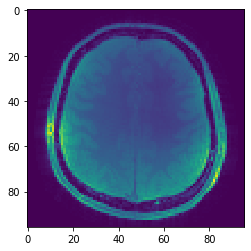

In [492]:
plt.imshow(abs(out[:,:,50]))

In [493]:
img_r2_repeat = np.repeat(img_r2,96,axis=2)
img_r2_repeat.shape
img=np.copy(img_r2_repeat)
csm = np.copy(sref_repeat)

In [494]:
out3d = caipi_recon3d(img_r2_repeat,sref_repeat,rx,ry,shifts)

break at 23,47
shuffle time:  1.3749604225158691 inversion time:  4.052978038787842 reshuffle time:  0.4257056713104248


In [504]:
out3d = caipi_recon3d(img_r2_repeat,sref_repeat,rx,ry,shifts)

break at 23,47
shuffle time:  1.4113883972167969 inversion time:  3.9037344455718994 reshuffle time:  0.43020153045654297


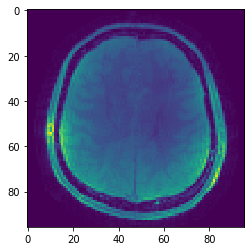

In [505]:
plt.imshow(abs(out3d[:,:,50]))

[[[1. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]]]


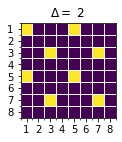

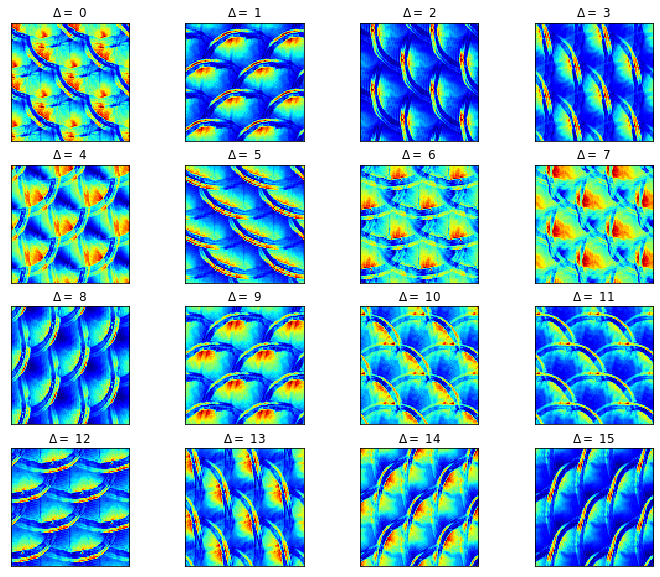

In [487]:
rx,ry = 2,4
R=rx*ry
shifts = [2]
p=handy.caipi(R,rx,shifts)
print(p)
handy.plot_caipi(p,shifts)
h = int(96/R)
mask = np.kron(np.ones((h,h)),p[0])
img = sp.ifft(mask*raw,axes=(1,2))
img_r2 = handy.swap(img)[:,:,None,:]
handy.plot_patterns(abs(img),4,'jet')

In [446]:
img = img_r2
csm = sref
def caipi_recon(img,csm,rx,ry,shifts):
    R = rx*ry
    Nx,Ny,Nz,Nc = img.shape
    out = np.zeros((Nx,Ny),dtype=complex)
    p = handy.caipi(R,rx,shifts)
    binary_aliasing_cell = abs(np.fft.fftn(p[0]))
    spatial_coord = np.argwhere(np.around(binary_aliasing_cell,2)!=0)
    ry = R//rx
    hx = int(Nx/rx)
    hy = int(Ny/ry)
    coord_matrix_check = np.zeros((Nx,Ny),dtype=int)
    coord_matrix = np.zeros((Nx,Ny,R,2),dtype=int)
    coord_test = np.zeros((Nx,Ny),dtype=int)

    out = np.zeros((Nx,Ny),dtype=complex)
    pixel_count = 0
    FOVx_scaled = Nx/R
    FOVy_scaled = Ny/R
    count = 0
    t1 = time.time()
    for x in np.arange(Nx):
        for y in np.arange(Ny):
            if coord_matrix_check[x,y]==0:
                coord_matrix[x,y,:,:] = ([x,y] + [FOVx_scaled,FOVy_scaled]*spatial_coord)%96
                coord_matrix_check[coord_matrix[x,y,:,0],coord_matrix[x,y,:,1]] = 1
                coord_test[x,y] = 1
                count += 1
            if count == Nx*Ny:
                print('break at {},{}'.format(x,y))
                break   
        else:
            continue
        break
    coord = np.argwhere(coord_test!=0)
    xsize = np.max(coord[:,0]+1)
    ysize = np.max(coord[:,1]+1)
    csm_matrix = np.zeros((xsize,ysize,R,Nc),dtype=complex)
    S_matrix = np.zeros((xsize,ysize,Nc,R),dtype=complex)
    hulp_matrix = np.zeros((xsize,ysize,Nc),dtype=complex)
    for x in np.arange(xsize):
        for y in np.arange(ysize):
            csm_aliased_points = csm[coord_matrix[x,y,:,0],coord_matrix[x,y,:,1],0,:]
            csm_matrix[x,y] = np.copy(csm_aliased_points)
            S = np.reshape(csm_matrix[x,y,:,:],(R,-1)).T
            hulp = np.reshape(img[x,y,:],(-1,1)).squeeze()
            S_matrix[x,y] = np.copy(S)
            hulp_matrix[x,y] = np.copy(hulp)

    t2 = time.time()

    S_all = np.reshape(S_matrix,(hx*hy,Nc,R))

    S_inv = np.linalg.pinv(S_all)
    hulp_all = np.reshape(hulp_matrix,(xsize*ysize,Nc))
    unfold = np.einsum('ijk,ik->ij',S_inv,hulp_all)
    unfold_reshape = np.reshape(unfold,(xsize,ysize,1,R))
    #out[coord_matrix[:,:,:,0],coord_matrix[:,:,:,1]] = unfold_reshape[:,:,:]
    t3 = time.time()
    for i,j in np.argwhere(coord_test!=0):
        out[coord_matrix[i,j,:,0],coord_matrix[i,j,:,1]] = unfold_reshape[i,j,:].squeeze()
    #for i in range(coord_test.shape[0]):
    #    for j in range(coord_test.shape[1]):
    #        out[coord_matrix[i,j,:,0],coord_matrix[i,j,:,1]] = unfold_reshape[i,j,:].squeeze()
    t4=time.time()
    print('shuffle time: ', t2-t1, 'inversion time: ', t3-t2,'reshuffle time: ', t4-t3)
    return out


shuffle time:  0.0933382511138916 inversion time:  0.033428192138671875 reshuffle time:  0.011492729187011719


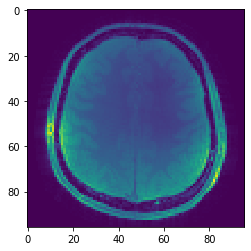

In [447]:
out = caipi_recon(img_r2,sref,rx,ry,shifts).squeeze()
plt.imshow(abs(out))

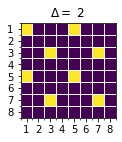

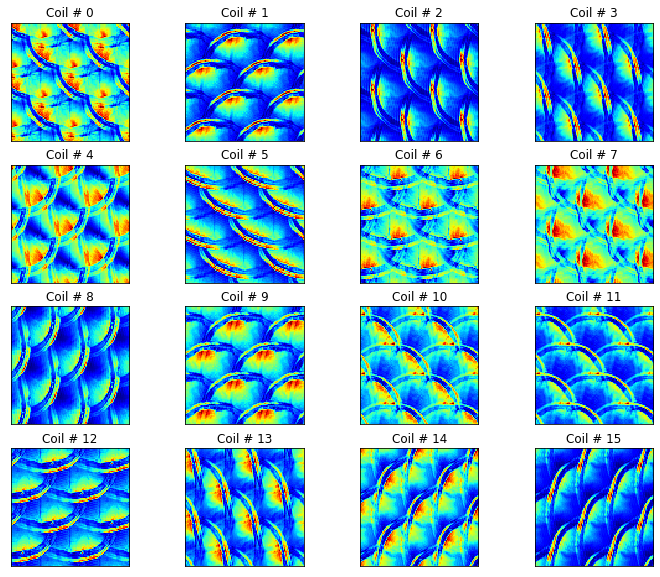

In [503]:
rx,ry = 2,4
R=rx*ry
shifts = [2]
p=handy.caipi(R,rx,shifts)
handy.plot_caipi(p,shifts)
h = int(96/R)
mask = np.kron(np.ones((h,h)),p[0])
img = sp.ifft(mask*raw,axes=(1,2))
img_r2 = handy.swap(img)[:,:,None,:]
handy.plot_patterns(abs(img),4,'jet')

In [415]:
pattern = np.loadtxt('C:\\Users\\jamalzada\\Documents\\Data\\CAIPI96x96_4by2.txt')

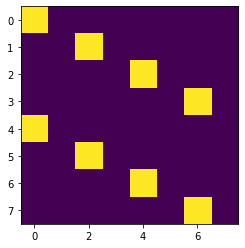

In [410]:
plt.imshow(p[0].T)

In [ ]:
def kspace_pattern_txt(ry,rz,)

In [393]:
s=np.arange(12).reshape((3,4))
print(s)
s[:,[0,1]] = s[:,[1,0]]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [394]:
s

array([[ 1,  0,  2,  3],
       [ 5,  4,  6,  7],
       [ 9,  8, 10, 11]])

In [398]:
c = np.argwhere(mask!=0)[:,:][:,[0,1]]-48
c[:,[0,1]] = c[:,[1,0]]

In [405]:
(c == pattern[:,:2]).all()

True

break at 11,95
shuffle time:  0.06787395477294922 inversion time:  0.051404476165771484 reshuffle time:  0.006487846374511719


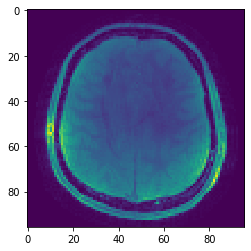

In [40]:
img_r2.shape

(96, 96, 1, 16)

In [305]:
p0 = sorted(glob.glob('C:/Users/jamalzada/Documents/Data/FFE*'))[0]
p1 = sorted(glob.glob('C:/Users/jamalzada/Documents/Data/2015*'))[0]

'C:/Users/jamalzada/Documents/Data\\2015-08-05 CAIPI2D geometry phantom ffe - FFE - no sense.mat'

In [306]:
data0 = loadmat(p0)

In [309]:
data1 = handy.read_matlab(p1)

In [310]:
data1.keys()

dict_keys(['#refs#', '#subsystem#', 'se', 'tg'])

In [332]:
rec = data1['tg']['FoldedImage']['real']+1j*data1['tg']['FoldedImage']['imag']


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [344]:
p1

'C:/Users/jamalzada/Documents/Data\\2015-08-05 CAIPI2D geometry phantom ffe - FFE - no sense.mat'

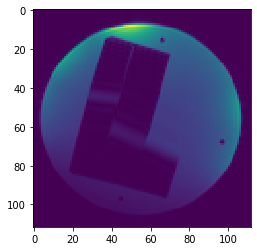

In [340]:
plt.imshow(abs(data1['tg']['FoldedImage'][40,:,:]))

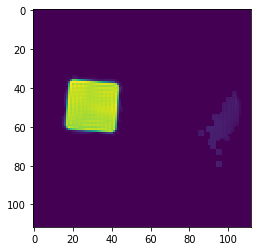

In [331]:
plt.imshow(abs(rec[50,:,:]))

In [316]:
data1['tg'].keys()

dict_keys(['DataAfterEPICorr', 'DataBeforeFFT', 'DataBeforeGrid', 'FileLocation', 'FoldedImage', 'Gridder', 'ImageBeforeSENSEUnfold', 'Info', 'NoiseCorrelationMatrix', 'Parameter', 'Reconstructed'])

In [272]:
csmarjan = data_arjan['csm_int']

In [274]:
sensearjan = data_arjan['sense1']

In [275]:
sensearjan.shape

(136, 128, 128, 14)

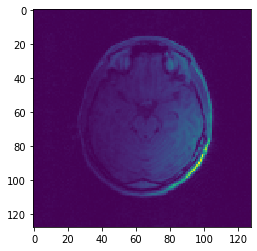

In [296]:
plt.imshow(abs(sensearjan[70,:,:,10]))